# 회귀계수축소법 : Ridge, Lasso, Elasticnet
- Ridge회귀 : l2규제 적용한 회귀
    - 타겟값과 예측값의 차의 제곱이 l2-loss
- Lasso회귀 : l1규제 적용한 회귀
    - 타겟값과 예측값의 차를 절대 값으로 구한 것이 l1-loss
- Elasticnet회귀 : l1+l2 규제 => 즉, ridge+lasso

## Ridge, Lasso, Elasticnet 차이점
-  Ridge와 Lasso의 가장 큰 차이는 Ridge는 계수를 0에 근사하도록 축소하나, Lasso는 계수를 완전하게 0으로 축소시킨다.
    - 따라서  Ridge의 경우 입력변수가 전반적으로 비슷한 수준으로 출력변수에 영향을 미치는 경우 사용하고, Lasso의 경우 출력변수에 미치는 입력변수의 영향력 편차가 큰 경우에 사용
- Lasso는 상관관계가 있는 다수의 변수들 중 하나를 무작위 선택하여 계수를 축소하는 반면, Elastic-Net은 상관성이 높은 다수의 변수들을 모두 선택하거나 제거

![image](https://user-images.githubusercontent.com/80219821/131979752-a93375dc-cdc7-4afc-9905-c18190e74fb5.png)

---
---

# 실습

## 01. 데이터 불러오기

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline

In [3]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

In [4]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.shape

(506, 14)

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)

## 03. Ridge

In [7]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [8]:
print(np.round(neg_mse_scores,3))
print(np.round(rmse_scores,3))
print(avg_rmse)

[-11.422 -24.294 -28.144 -74.599 -28.517]
[3.38  4.929 5.305 8.637 5.34 ]
5.518166280868971


In [9]:
alphas = np.logspace(-2,2,5)
alphas

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [10]:
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha={0}일때, 5 foldas의 평균 RMSE={1:4f}'.format(alpha,avg_rmse))

alpha=0.01일때, 5 foldas의 평균 RMSE=5.824070
alpha=0.1일때, 5 foldas의 평균 RMSE=5.788487
alpha=1.0일때, 5 foldas의 평균 RMSE=5.652571
alpha=10.0일때, 5 foldas의 평균 RMSE=5.518166
alpha=100.0일때, 5 foldas의 평균 RMSE=5.329590


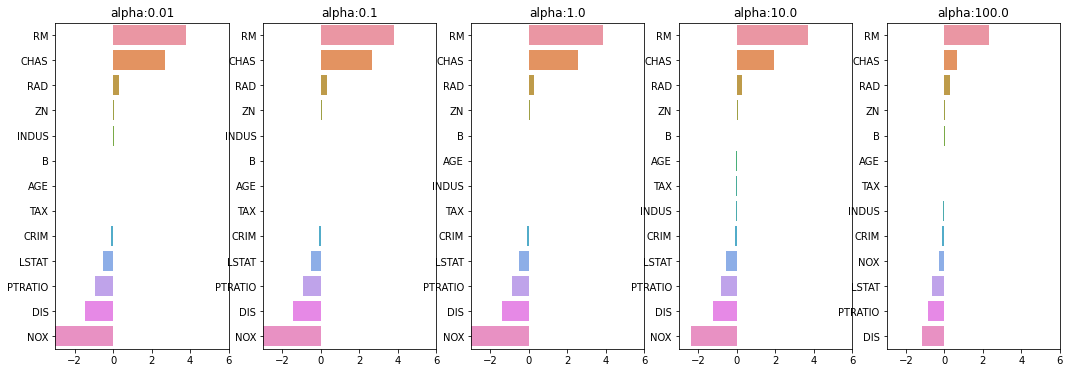

In [11]:
f, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    ax[pos].set_title(colname)
    ax[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax[pos])

plt.show()

In [12]:
ridge_alphas = alphas
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.01,alpha:0.1,alpha:1.0,alpha:10.0,alpha:100.0
RM,3.810767,3.818233,3.854000,3.702272,2.334536
CHAS,2.685010,2.670019,2.552393,1.952021,0.638335
RAD,0.305781,0.303515,0.290142,0.279596,0.315358
ZN,0.046436,0.046572,0.047443,0.049579,0.054496
INDUS,0.020076,0.015999,-0.008805,-0.042962,-0.052826
B,0.009318,0.009368,0.009673,0.010037,0.009393
AGE,0.000590,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012344,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.107954,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524885,-0.525966,-0.533343,-0.559366,-0.660764


---
---

## 04. Lasso

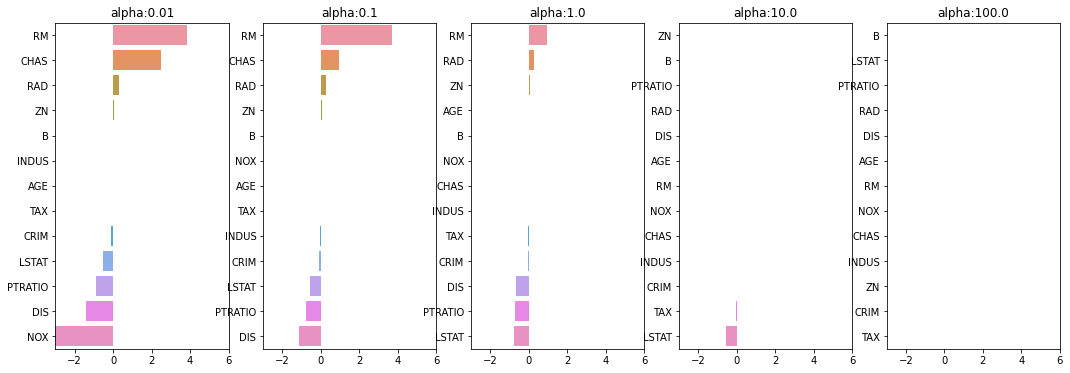

In [13]:
f, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_data, y_target)
    
    coeff = pd.Series(data=lasso.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    ax[pos].set_title(colname)
    ax[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax[pos])

plt.show()

In [14]:
coeff_df

,alpha:0.01,alpha:0.1,alpha:1.0,alpha:10.0,alpha:100.0
CRIM,-0.106228,-0.097894,-0.063437,-0.000000,-0.000000
ZN,0.046860,0.049211,0.049165,0.026146,0.000000
INDUS,0.006474,-0.036619,-0.000000,-0.000000,-0.000000
CHAS,2.504190,0.955190,0.000000,0.000000,0.000000
NOX,-14.394478,-0.000000,-0.000000,0.000000,-0.000000
RM,3.814186,3.703202,0.949811,0.000000,0.000000
AGE,-0.001818,-0.010037,0.020910,0.000000,-0.000000
DIS,-1.422155,-1.160538,-0.668790,-0.000000,0.000000
RAD,0.298526,0.274707,0.264206,0.000000,-0.000000
TAX,-0.012627,-0.014570,-0.015212,-0.009282,-0.020972


## 04. Elasticnet

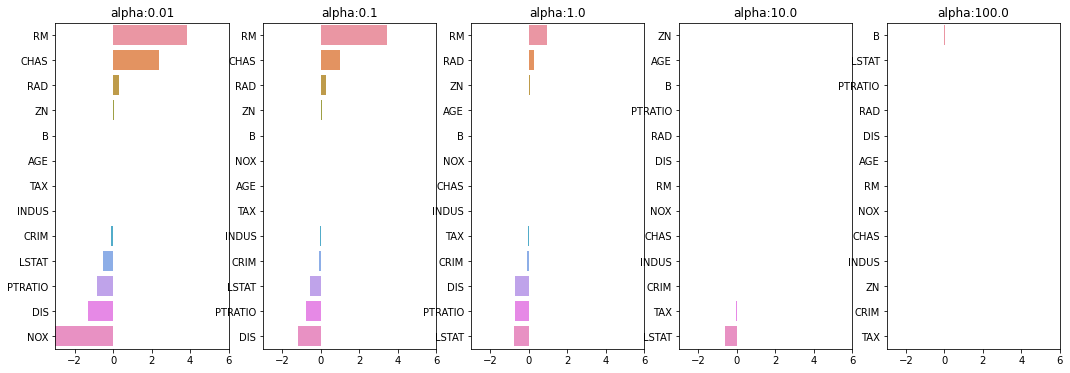

In [15]:
f, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    elasticnet = ElasticNet(alpha = alpha, l1_ratio=0.7)
    elasticnet.fit(X_data, y_target)
    
    coeff = pd.Series(data=elasticnet.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    ax[pos].set_title(colname)
    ax[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax[pos])

plt.show()

In [16]:
elasticnet_alphas = alphas
sort_column = 'alpha:'+str(elasticnet_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.01,alpha:0.1,alpha:1.0,alpha:10.0,alpha:100.0
RM,3.850281,3.414154,0.938789,0.000000,0.000000
CHAS,2.384052,0.979706,0.000000,0.000000,0.000000
RAD,0.284221,0.283443,0.289299,0.000000,0.000000
ZN,0.047929,0.050617,0.052136,0.034126,0.000000
B,0.009827,0.010067,0.008320,0.007435,0.007863
AGE,-0.007635,-0.008276,0.020348,0.010363,-0.000000
TAX,-0.013226,-0.014814,-0.016218,-0.008981,-0.021195
INDUS,-0.020189,-0.042719,-0.000000,-0.000000,-0.000000
CRIM,-0.103056,-0.099213,-0.073577,-0.000000,-0.000000
LSTAT,-0.539139,-0.587702,-0.760457,-0.605301,-0.000000


In [17]:
for alpha in alphas :
    elasticnet = ElasticNet(alpha = alpha)
    
    neg_mse_scores = cross_val_score(elasticnet, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha={0}일때, 5 foldas의 평균 RMSE={1:4f}'.format(alpha,avg_rmse))

alpha=0.01일때, 5 foldas의 평균 RMSE=5.604829
alpha=0.1일때, 5 foldas의 평균 RMSE=5.478389
alpha=1.0일때, 5 foldas의 평균 RMSE=5.521582
alpha=10.0일때, 5 foldas의 평균 RMSE=6.472030
alpha=100.0일때, 5 foldas의 평균 RMSE=8.311597
